In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification
from sklearn.metrics import r2_score
from scipy import linspace, polyval, sqrt, randn

In [2]:
# sample data creation
# number of points 
n = int(5000)
X = np.linspace(-20, 20, n)
# equation parameters
a = 3.25; b = -6.5
Y = polyval([a,b], X)
# add some gaussian noise
Yn = Y + 3 * randn(n)

Full Gradient Descent..
Time taken:  0.17 secs
No of iterations:  92
R2 score:  0.9687
Plot: 


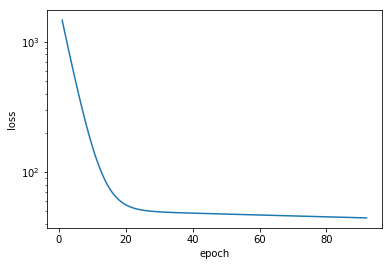

In [3]:
# Full Gradient Descent
# initial slope and intercept for model
start = time.time()
m = 0
c = 0
prev_step = 1
precision = 0.000001
eta = 0.0005 # learning rate
epoch = 0
max_epochs = 2000 # no of iterations to run GD
aggregate_loss = []

# perform full gradient descent
while prev_step > precision and epoch < max_epochs:
    Y_pred = m * X + c
    loss = (1/n)* sum((Yn - Y_pred) ** 2)
    aggregate_loss.append(loss)
    D_m = (-2/n) * sum((Yn - Y_pred) * X)
    D_c = (-2/n) * sum(Yn - Y_pred)
    prev_m = m
    m = m - eta * D_m
    c = c - eta * D_c
    prev_step = abs(m - prev_m)
    epoch += 1
end = time.time()

# predict values
Y_pred = m * X + c

print("Full Gradient Descent..")
print("Time taken: ", round(end - start, 2), "secs")
print("No of iterations: ", epoch)
print("R2 score: ", round(r2_score(Yn, Y_pred), 4))

# loss function plot
x_axis = np.linspace(1, epoch, epoch, endpoint=True)
plt.semilogy(x_axis, aggregate_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
print("Plot: ")
plt.show()

# plot result
# plt.scatter(X, Y)
# print("Plot: ")
# plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # regression line
# plt.show()

Stochastic Gradient Descent..
Time taken:  1.97 secs
R2 score:  0.966
Plot: 


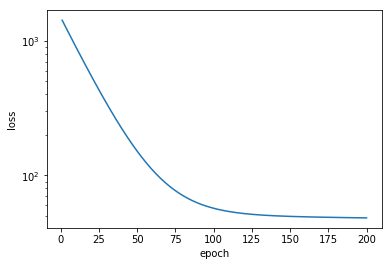

In [4]:
# Stochastic Gradient Descent
# initial slope and intercept for model
start = time.time()
m = 0
c = 0
eta = 0.0001 # learning rate
epoch = 0
max_epochs = 200 # no of iterations to run GD
aggregate_loss = []

for epoch in range(max_epochs):
    Y_pred = np.empty(len(X))
    for i in range(len(X)):
        Y_pred[i] = (m * X[i] + c)
        D_m = (-2/n) * ((Yn[i] - Y_pred[i]) * X[i])
        D_c = (-2/n) * (Yn[i] - Y_pred[i])
        m = m - eta * D_m
        c = c - eta * D_c
    loss = (1/n)* sum((Yn - Y_pred) ** 2)
    aggregate_loss.append(loss)
end = time.time()

# predict values
Y_pred = m * X + c

print("Stochastic Gradient Descent..")
print("Time taken: ", round(end - start, 2), "secs")
print("R2 score: ", round(r2_score(Yn, Y_pred), 4))

# loss function plot
x_axis = np.linspace(1, epoch+1, epoch+1, endpoint=True)
plt.semilogy(x_axis, aggregate_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
print("Plot: ")
plt.show()